In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import numpy as np
from IPython.display import display, clear_output
import time

In [28]:
class driver():
    """Creates a driver capable of picking up riders and taking them to their destination. Drivers may only have 1 rider at a
    time. """
    
    def __init__(self, x_dim, y_dim):
        """Defines a driver whose default location is randomly located within the dimensions of the world and who hasn't been
        hired and doesn't have a rider in their vehicle."""
        self.x = np.random.randint(0,x_dim)
        self.y = np.random.randint(0,y_dim)
        self.location = (self.x, self.y)
        self.has_job = False     # True from when the rider selects the driver until they've been dropped off
        self.has_rider = False   # True when rider is in their car
        
    def move(self):
        """Moves driver one position closer to their destination."""
        # Pull from Katrina's code/"11_OOP-in_class_assignment"
        pass
        
    def draw(self):
        """Plots the driver green if they have a rider, red if they don't have a rider."""
        color = 'r'
        if (self.has_rider == True):
            color = 'g'
        plt.scatter(self.x, self.y, color=color)
        

In [29]:
class rider():
    """Creates a driver capable of picking up riders and taking them to their destination. Drivers may only have 1 rider at a
    time. Once assigned to a rider, a driver will their rider directly to their destination immediately."""
    
    def __init__(self, x_dim, y_dim):
        """Defines a rider whose default location is randomly located within the dimensions of the world, who has a
        destination at another location, and who has no driver."""
        self.x = np.random.randint(0,x_dim)
        self.y = np.random.randint(0,y_dim)      
        self.location = (self.x, self.y)
        self.x_dest = np.random.randint(0,x_dim)
        self.y_dest = np.random.randint(0,y_dim)  
        self.destination = (self.x_dest, self.y_dest)
        self.my_driver = "None"
        # Still need to prevent possibility of location and destination being the same
        
    def closest_available_driver():
        """ Calculates the distance between the rider and all available drivers, and then returns the closest one."""
        #return closest
        pass
    
    def draw(self):
        """Plots the rider yellow."""
        color = 'y'
        plt.scatter(self.x, self.y, color=color)
    

In [42]:
def run(num_drivers = 2, rider_spawn_prob = 0.1, x_dim = 70, y_dim = 30, iterations = 100):
    """Creates a world of size x_dim by y_dim with the specified number of drivers (red points) and runs a simulation in which
    riders (yellow points) and their destinations (red splotches) spawn according to the given rider spawn probability, riders
    select the closest driver, and said driver picks up the rider and drops them off at their destination."""
    
    # Initializes an empty array for the world
    world = np.zeros((x_dim,y_dim))
    
    # Creates a list of drivers
    drivers = [driver(x_dim,y_dim) for a in range(0,num_drivers)]
    
    # Create an empty list for riders
    riders = []
    
    
    iterations_ran = 0
    
    while iterations_ran < iterations:
        
        if rider_spawn_prob > random.random():
            
            # A new rider & their destination spawn
            new_rider = rider(x_dim,y_dim)   
            riders.append(new_rider)
            destination = np.random.randint(0,x_dim), np.random.randint(0,y_dim)
            world[destination] = 15
            
            # Assigns the closest available driver to the rider. 
            #closest_driver = new_rider.closest_available_driver()
            #new_rider.my_driver() = closest_driver
            #closest_driver.has_job() = True
            
            # ...
        
        # For each driver, if they have a job move towards their destination.
        for d in drivers:
            if d.has_job == True:
                pass
        
        iterations_ran += 1
        
        
        # Plots world
        fig, ax = plt.subplots(figsize=(30,15))
        plt.imshow(world.T, origin='lower', aspect='equal')
        for d in range(0,num_drivers):
            drivers[d].draw()
        for r in range(0,len(riders)):
            riders[r].draw()

        # Allows animation
        clear_output(wait=True) # Clear output for dynamic display
        display(fig)            # Reset display
        fig.clear()             # Prevent overlapping and layered plots
        time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up
    

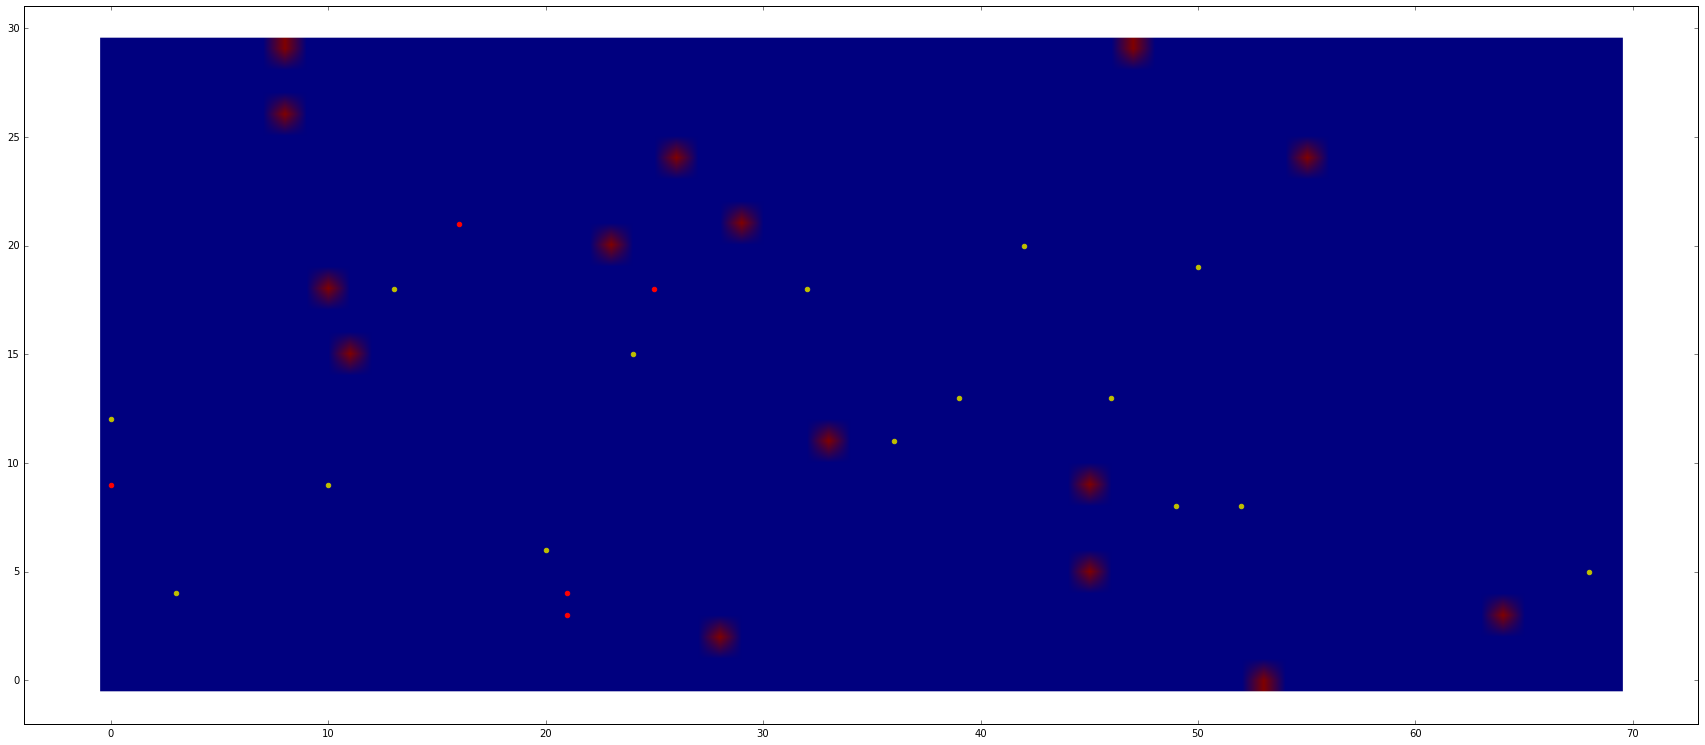

In [43]:
run(num_drivers = 5)
# drivers = red points, riders = yellow points, & destinations = red splotches 
# Figure out why simulation prints "<matplotlib.figure.Figure at 0x7f2e8d2eff28>" below and get rid of it

***Extra Ideas***

-Idea for how to organize riders & destinations
    # Initializes an empty dictionary of riders and their destinations (with the form rider:destination).
    riders_dict = dict()
    
    for i in range(0,num_riders):
        new_rider = np.random.randint(0,x_dim), np.random.randint(0,y_dim)
        new_destination = np.random.randint(0,x_dim), np.random.randint(0,y_dim)
    
    
-Try using nearest neighbor algorithm to speed up driver selection of rider

-It may make sense to create an additional list of only the visible riders (i.e. those that aren't being driven). Also, remember later to remove riders that have been dropped off from the riders list so they aren't plotted!

-Consider making the visualization a separate function (that can be turned on or off (so that you can collect data faster).

MO:
- Spawn drivers
- Iteratively,
   - Rider may or may not spawn
   - When rider spawns, 
       - Calculate distances between rider and each available driver.
       - Determine closest driver
       - Set the closest driver's destination to the rider's location. (Once assigned to a rider, a driver will take their rider 
         directly to their destination immediately.) 
       - Each driver travels towards their rider's location (if they have a job) or stays put
       - ...
   - 
   
   Wait time = amount of time rider waits after driver has been selected
   drive time = amount of interations it takes to get to the destination